In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
from collections import OrderedDict
from scipy.stats.mstats import gmean




fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline



In [2]:
df=pd.read_excel('/ocean/ksuchy/MOAD/observe/DiatomGrowthRateVSpH.xlsx',engine='openpyxl')

In [3]:
df

,pH,CO2 (umol kg-1),Specific growth rate (d-1),Relative growth rate (d-1),Species,Name,Reference
0,9.02,0.8,1.00,0.645161,Thalassiosira weissflogii,Tweiss1,Li et al. 2019
1,8.83,1.6,1.25,0.806452,Thalassiosira weissflogii,Tweiss1,Li et al. 2019
2,8.63,3.4,1.30,0.838710,Thalassiosira weissflogii,Tweiss1,Li et al. 2019
3,8.44,6.1,1.35,0.870968,Thalassiosira weissflogii,Tweiss1,Li et al. 2019
4,8.16,13.5,1.55,1.000000,Thalassiosira weissflogii,Tweiss1,Li et al. 2019
5,7.93,25.5,1.55,1.000000,Thalassiosira weissflogii,Tweiss1,Li et al. 2019
6,7.63,54.6,1.50,0.967742,Thalassiosira weissflogii,Tweiss1,Li et al. 2019
7,6.40,NaN,0.50,0.641026,Thalassiosira weissflogii,Tweiss2,Hervé et al. 2012
8,6.80,NaN,0.53,0.679487,Thalassiosira weissflogii,Tweiss2,Hervé et al. 2012
9,7.30,NaN,0.70,0.897436,Thalassiosira weissflogii,Tweiss2,Hervé et al. 2012


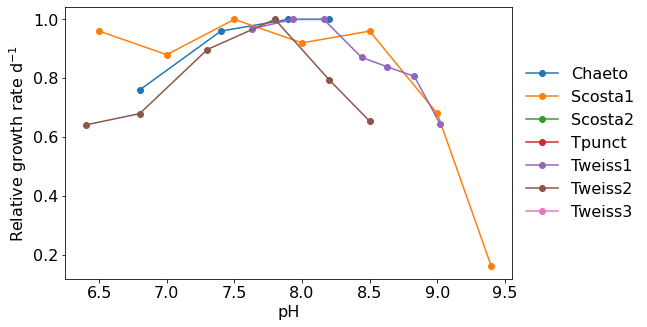

In [13]:
fig,ax=plt.subplots(1,1,figsize=(8,5))

# Plot data by category
groups = df.groupby('Name')
for name, group in groups:
    ax.plot(group['pH'], group['Relative growth rate (d-1)'], marker='o',linestyle='-', label=name)

ax.set_xlabel('pH')
ax.set_ylabel('Relative growth rate d$^{-1}$')
ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

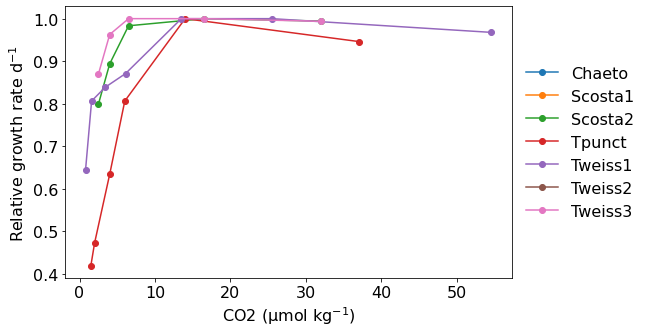

In [14]:
fig,ax=plt.subplots(1,1,figsize=(8,5))

# Plot data by category
groups = df.groupby('Name')
for name, group in groups:
    ax.plot(group['CO2 (umol kg-1)'], group['Relative growth rate (d-1)'], marker='o',linestyle='-', label=name)

ax.set_xlabel('CO2 (\u03bcmol kg$^{-1}$)')
ax.set_ylabel('Relative growth rate d$^{-1}$')
ax.legend(frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()